In [1]:
import scripts.pipeline as pipeline
import scripts.analisys as analisys
import scripts.model_preparation as model_preparation
import scripts.model as model
import scripts.model_interpretation as model_interpretation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

## Анализ результатов

#### Загрузим данные по крестам

In [3]:
raw_crosses = pipeline.get_raw_crosses('dataset/crosses.csv')
raw_crosses.head()

/home/aklyukvin/go/src/github.com/Sovianum/hustleScrape/dataanalisys/scripts/pipeline.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.passed[df.passed == 0] = -1


,competitor_id,competition_id,judge_name,category,phase,passed
0,10655,NORD CUP 2020_2020-03-13,лебедев сергей,dnd beginner,16,1
1,10655,NORD CUP 2020_2020-03-13,александр милованов,dnd beginner,16,1
2,10655,NORD CUP 2020_2020-03-13,ирина кудрявцева,dnd beginner,16,1
3,10655,NORD CUP 2020_2020-03-13,кудрявцев михаил,dnd beginner,16,1
4,10486,NORD CUP 2020_2020-03-13,ирина кудрявцева,dnd beginner,16,1


In [4]:
# выдадим спортсменам синтетический инкрементные идентификаторы
# а также дадим уникальные турнирные идентификаторы

raw_crosses = pipeline.enrich_crosses_df(raw_crosses)

#### Загрузим данные по местам

In [5]:
raw_places = pipeline.get_raw_places('dataset/results.csv')
raw_places.head()

,competitor_id,category,competition_id,total_competitors,place_low,place_high,place
0,11220,dnd beginner,NORD CUP 2020_2020-03-13,52,1,1,1.0
1,8082,dnd beginner,NORD CUP 2020_2020-03-13,52,2,2,2.0
2,11190,dnd beginner,NORD CUP 2020_2020-03-13,52,3,3,3.0
3,10311,dnd beginner,NORD CUP 2020_2020-03-13,52,4,4,4.0
4,1650,dnd beginner,NORD CUP 2020_2020-03-13,52,5,5,5.0


In [6]:
results = pipeline.join_crosses_and_results(raw_crosses, raw_places)
results.head()

,competitor_id,competition_id,judge_name,category,phase,passed,syntethic_competitor_id,unique_id,category_label,total_competitors,place_low,place_high,place
0,10655,NORD CUP 2020_2020-03-13,лебедев сергей,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
1,10655,NORD CUP 2020_2020-03-13,александр милованов,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
2,10655,NORD CUP 2020_2020-03-13,ирина кудрявцева,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
3,10655,NORD CUP 2020_2020-03-13,кудрявцев михаил,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
4,10655,NORD CUP 2020_2020-03-13,александр милованов,dnd beginner,8,-1,21.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5


#### Будем рассматривать только судей, которые поставили больше некоторого порога оценок

In [7]:
results = pipeline.remove_not_popular_judge_records(results, 1000)
results.head()

,competitor_id,competition_id,judge_name,category,phase,passed,syntethic_competitor_id,unique_id,category_label,total_competitors,place_low,place_high,place
0,10655,NORD CUP 2020_2020-03-13,лебедев сергей,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
1,10655,NORD CUP 2020_2020-03-13,александр милованов,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
2,10655,NORD CUP 2020_2020-03-13,ирина кудрявцева,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
3,10655,NORD CUP 2020_2020-03-13,кудрявцев михаил,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
4,10655,NORD CUP 2020_2020-03-13,александр милованов,dnd beginner,8,-1,21.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5


#### Также уберем всех спортсменов, у которых меньше 20 оценок 

In [8]:
results = pipeline.remove_not_popular_judge_records(results, 20)
results.head()

,competitor_id,competition_id,judge_name,category,phase,passed,syntethic_competitor_id,unique_id,category_label,total_competitors,place_low,place_high,place
0,10655,NORD CUP 2020_2020-03-13,лебедев сергей,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
1,10655,NORD CUP 2020_2020-03-13,александр милованов,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
2,10655,NORD CUP 2020_2020-03-13,ирина кудрявцева,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
3,10655,NORD CUP 2020_2020-03-13,кудрявцев михаил,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
4,10655,NORD CUP 2020_2020-03-13,александр милованов,dnd beginner,8,-1,21.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5


#### Набустрапим по 50 подвыборок величиной 0.8 от исходного датасета 

In [9]:
bootstrapped_datasets = pipeline.bootstrap_by_category_labels(results, 0.8, 50, 250)

In [10]:
bootstrapped_total_datas = [model_preparation.get_total_diff_based_model_data(dataset) for dataset in bootstrapped_datasets]

#### Обучим модели на бутстрапленных выборках

In [11]:
regression_data = [model.get_regression(total_data) for total_data in bootstrapped_total_datas]

#### Построим распределение коэффициентов детерминации полученных моделей 

<Figure size 1280x960 with 0 Axes>

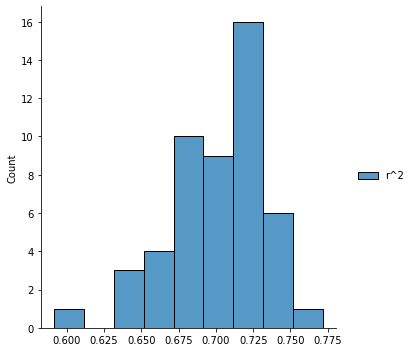

In [12]:
plt.figure(figsize=(16, 12), dpi=80)

sns.displot(pd.DataFrame({
    "r^2": [tup[1] for tup in regression_data]
}), binwidth=0.02)

Видно, что мы имеем +- симметричное распределение в районе 0.725. То есть нет каких-то лютых забросов. При этом коэффициенты детерминации довольно сильно кучкуются в центре

#### Построим датафрейм нормированных весов для каждой из моделей

In [13]:
coef_datas = []

for i in range(len(regression_data)):
    coef_data = model_interpretation.get_model_coefs(
        regression_data[i][0], bootstrapped_total_datas[i]
    ).negate()
    
    coef_datas.append(coef_data)
    


coefs_df = pd.DataFrame.from_records([coef_data.coefs for coef_data in coef_datas], columns=coef_datas[0].labels)

#### Посортируем полученные данные по медианному значению соответствующего коэффициента

In [14]:
coefs_df = coefs_df[coefs_df.median().sort_values(ascending=False).index]
coefs_df = coefs_df / coefs_df.max().max()

#### Построим графики распределения коэффициентов по судьям

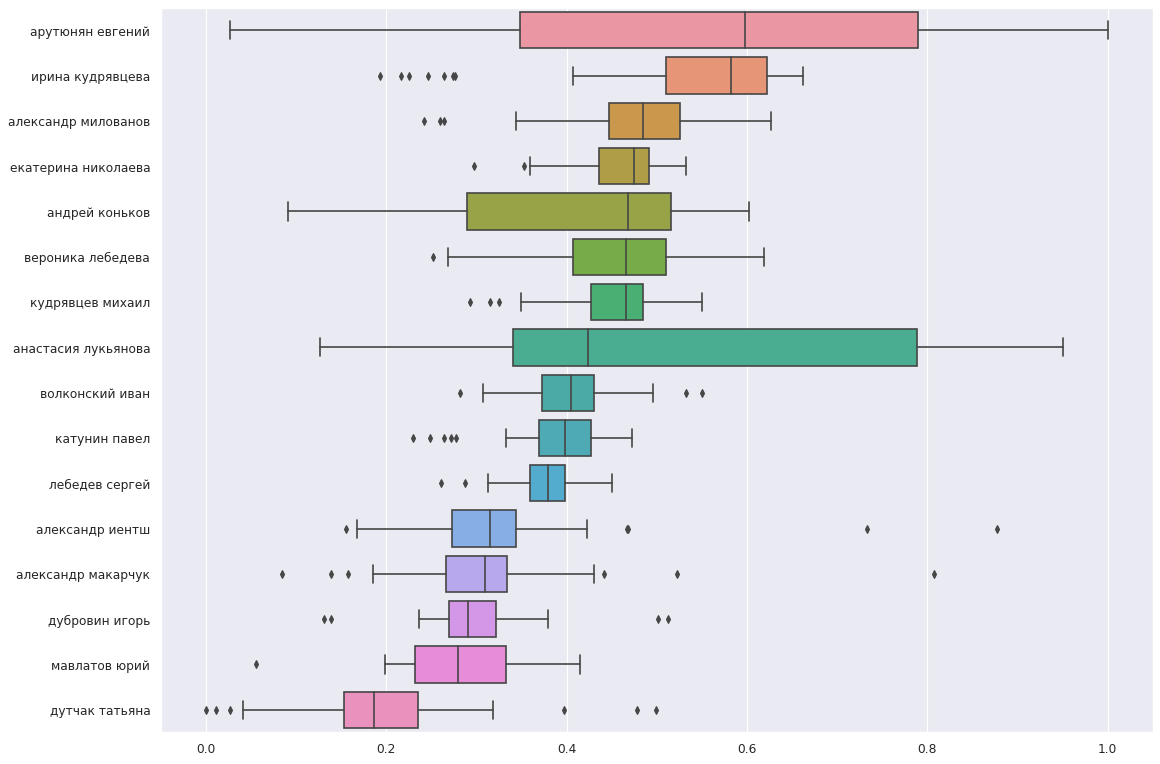

In [15]:
plt.figure(figsize=(16, 12), dpi=80)

sns.set()
sns.boxplot(data=coefs_df, orient='h')
# sns.swarmplot(data=coefs_df, orient='h', color=".25")

In [16]:
results.category_label.unique().size

90